## Import necessary libraries

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### Load your dataset

In [3]:
df = pd.read_csv("Housing.csv")

### Explore your dataset

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
 dataset = df.drop(["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning","prefarea", "furnishingstatus"], axis = 1)

In [6]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


### Define features (X) and the target variable (y)

In [7]:
x = dataset.drop(["price"], axis = 1)

In [8]:
x.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [9]:
y = dataset["price"]
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

### Split the data into a training set and a testing set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [11]:
X_train

,area,bedrooms,bathrooms,stories,parking
36,7482,3,2,3,1
120,6540,3,1,1,2
113,9620,3,1,1,2
73,6600,2,2,4,0
51,6325,3,1,4,1
...,...,...,...,...,...
318,4340,3,1,1,0
18,4600,3,2,2,2
21,7155,3,2,1,2
311,6060,2,1,1,1


In [12]:
y_train

36     8043000
120    5950000
113    6083000
73     6685000
51     7420000
        ...   
318    4060000
18     8890000
21     8680000
311    4123000
95     6300000
Name: price, Length: 327, dtype: int64

### Create a Linear Regression model

In [13]:
model = LinearRegression()

### Train the model on the training data

In [14]:
model.fit(X_train, y_train)

LinearRegression()

### Make predictions on the test data

In [15]:
y_pred = model.predict(X_test)

In [16]:
y_pred

array([5483112.76438458, 4488800.85921177, 3604079.52966533,
       4184869.93898585, 4359595.5189796 , 3319698.81886784,
       5027963.00449329, 8024115.37392603, 4043186.36962567,
       6117587.88515146, 5738801.24804003, 2956844.01443312,
       4007578.03406373, 4040126.01866857, 4343627.66025462,
       5710447.8812935 , 5382557.32036614, 3266481.71497175,
       5596817.85344203, 7966721.31207213, 6299713.09356522,
       4377220.1997636 , 2990418.18779431, 3359951.71993787,
       3376495.81976943, 7446529.97516722, 5515559.47419788,
       4854266.06695382, 3124048.37272398, 2883769.517106  ,
       4367271.21274981, 3034253.43956778, 3297445.48502562,
       4680868.95465219, 4671879.64887386, 8341494.01697814,
       3640768.4461797 , 6337244.50407366, 2906816.00864888,
       4665650.8688148 , 3526202.49698041, 5655741.73765083,
       4414955.41863276, 6313538.15653315, 5345100.06280461,
       5429613.49515116, 4596093.47344786, 2997096.91550314,
       5194381.56384827,

In [17]:
model.predict([[6000,3,2,4,1]])

array([7165245.64137512])

In [18]:
model.predict([[7200,3,2,1,3]])

array([6667339.46321214])

### Visualize the predictions

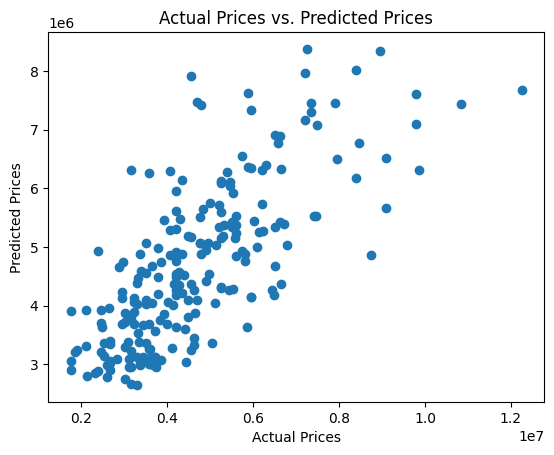

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()